# Lab 2: More ggplot and dplyr

## Agenda
    *More geom's
    *More on positioning of bar charts
    *log-log transformation
    *Intro to dplyr (covered up to Arrange)

In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.1.3     ✔ dplyr   0.8.1
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0

Warning message:
“package ‘tibble’ was built under R version 3.5.2”
Warning message:
“package ‘dplyr’ was built under R version 3.5.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [39]:
rand_idx = runif(1000, min=1, max=dim(diamonds)[1])
dm = diamonds[rand_idx, ]
names(dm)
dim(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

[1] 1000   10

# ggplot

## Geometric objects
So far we have plotted the points in a fundamental manner. We might be interested in the linear trends of the data that we have.

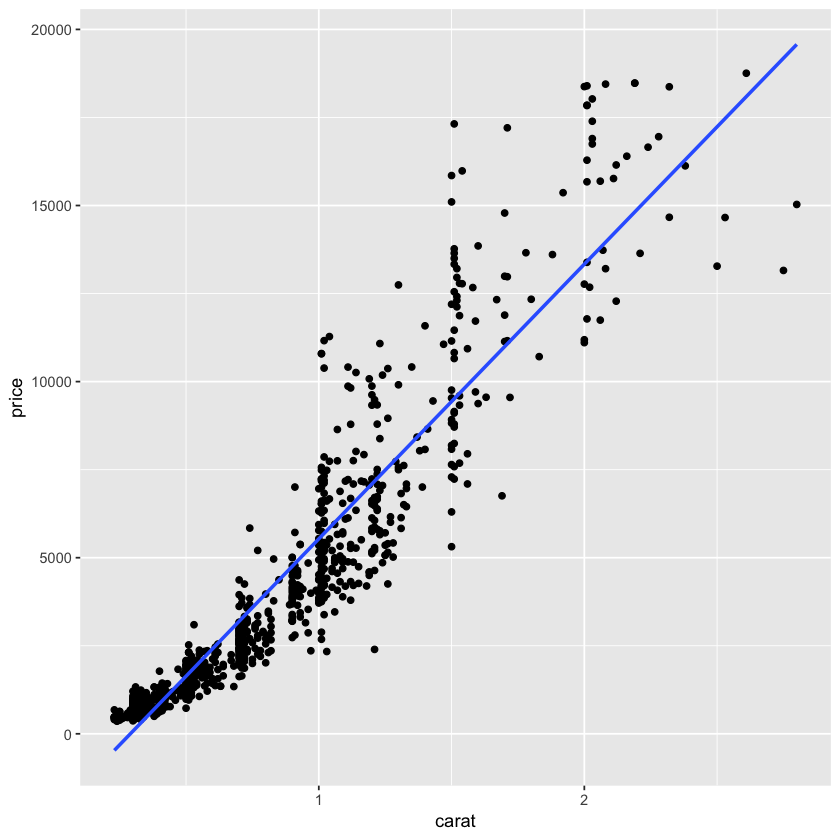

In [54]:
p2 = ggplot(dm,aes(x=carat,y=price)) +
    geom_point() +
    geom_smooth(method = 'lm',se=F)
print(p2)

### Exercise:
1. Try to produce the same plot but using method = 'loess'.
2. What does the se argument do in the geom_smooth function?

### Solution

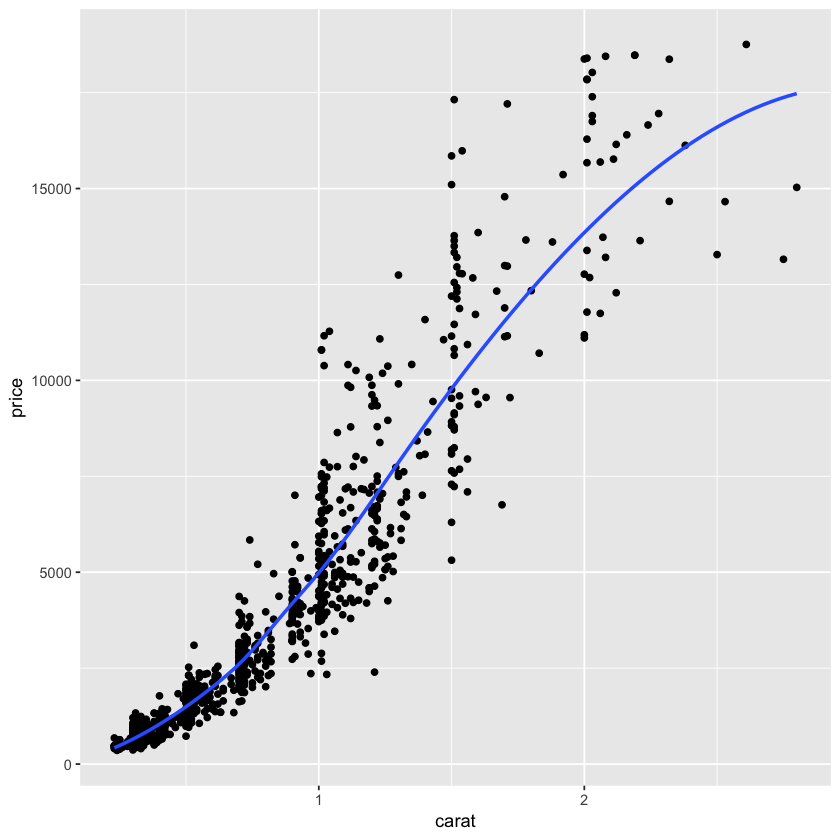

In [63]:
p3 = ggplot(dm, mapping = aes(x=carat,y=price)) + 
    geom_point() + 
    geom_smooth(method = 'loess', se = F)
p3

### Exercise
1. What if you want to see the trend for each category of clarity?
2. Run this code in your head and predict what the output will look like. Then, run the code in R and check your predicions.

### Solution

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



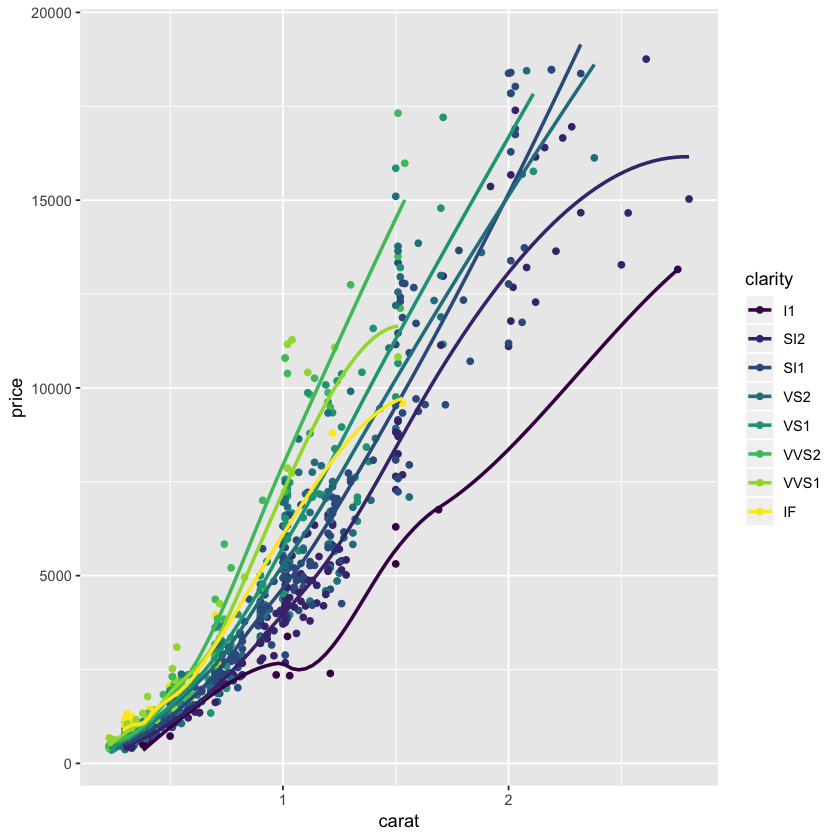

In [60]:
p4 = ggplot(dm, aes(carat,price,color=clarity)) + 
    geom_point() + 
    geom_smooth(se=F)
p4

## Scale transformation

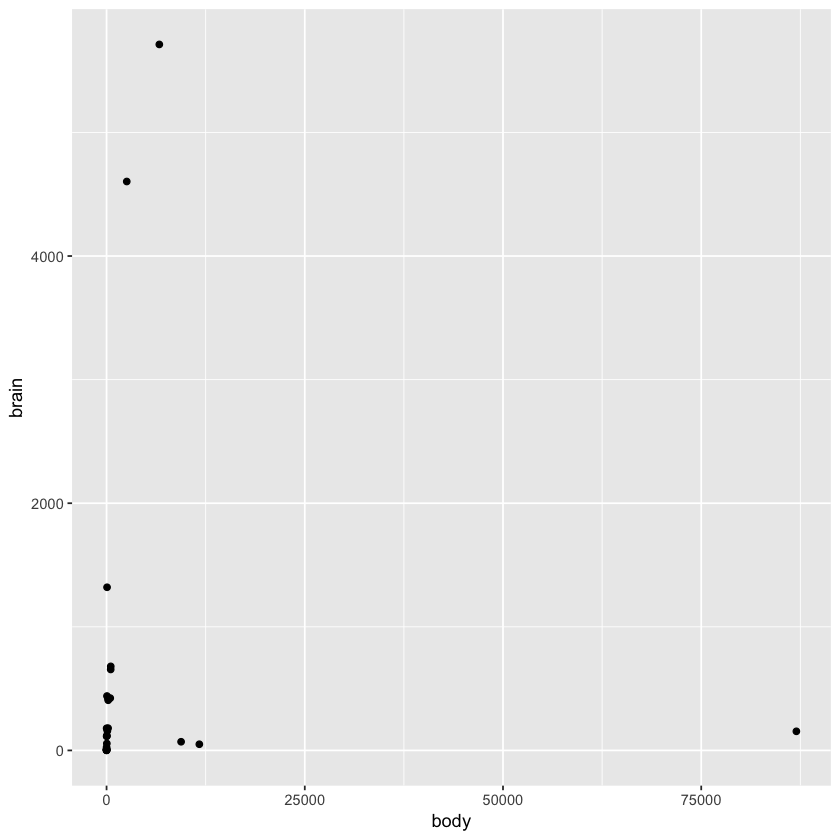

In [34]:
ggplot(MASS::Animals, aes(x = body, y = brain)) +
    geom_point()

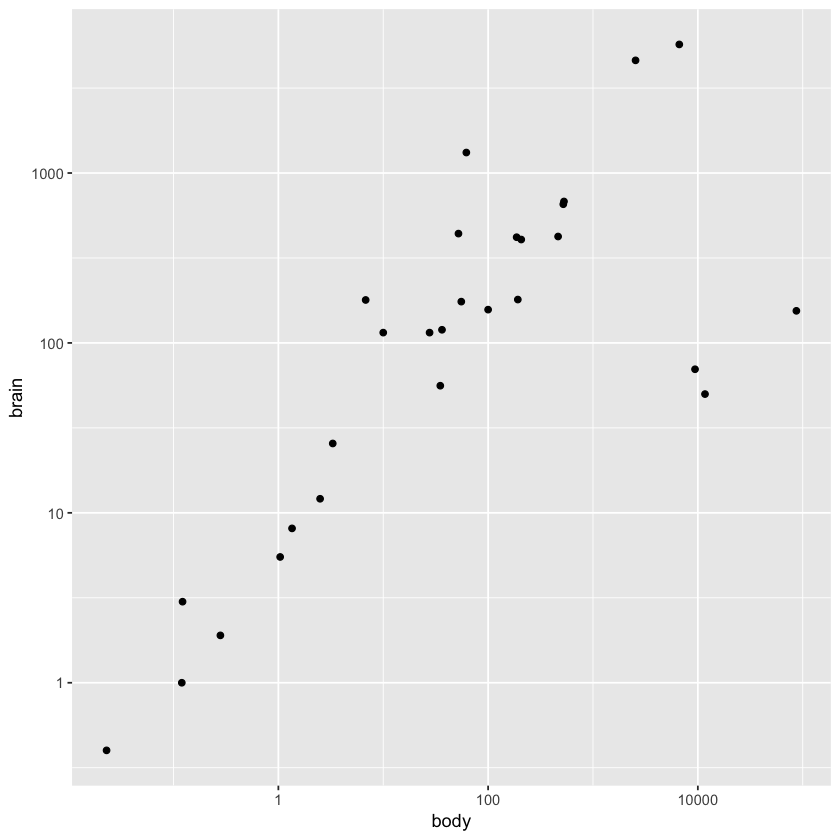

In [4]:
ggplot(MASS::Animals, aes(x = body, y = brain)) + 
    geom_point() + scale_x_log10() + scale_y_log10()

## Position adjustments for bar charts

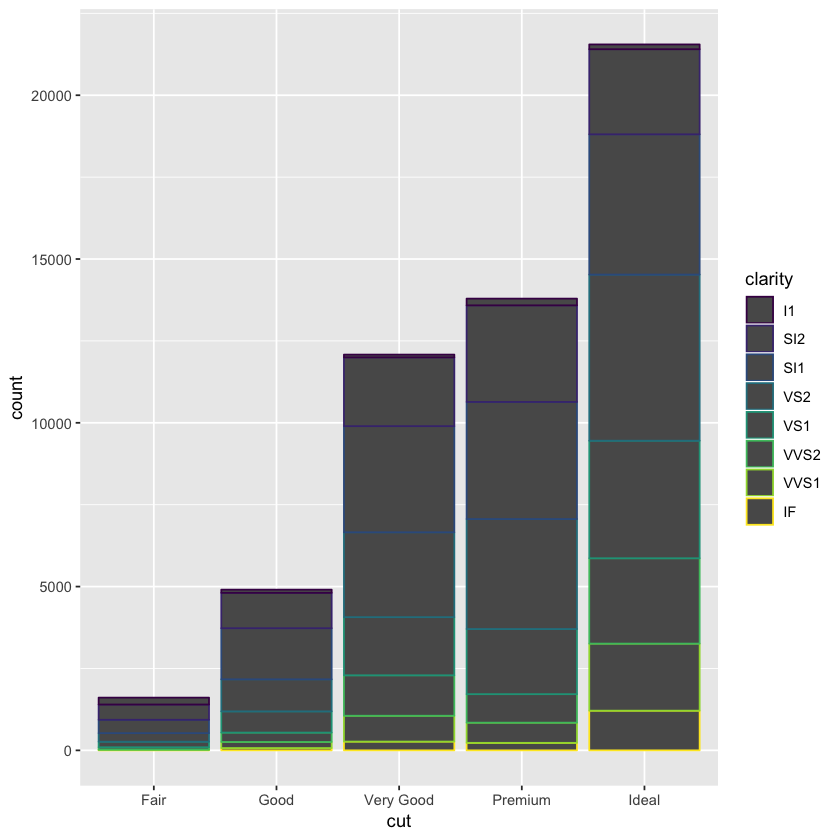

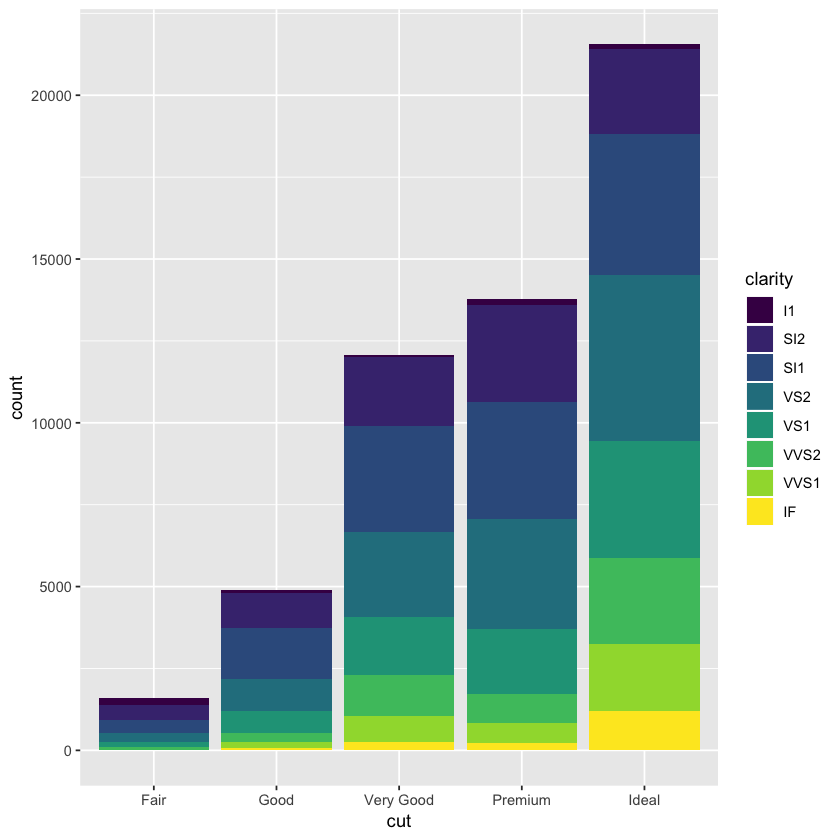

In [42]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = clarity))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))

Remmeber that we can "color by" a different variable - in this case, clarity. By default, it stacks the bars for each clarity level. This is done using the positional adjustment specified by the position argument of geom_bar. If you don't want a stacked bar chart, you can use one of three other options: "identity", "dodge", or "fill".

*position = "identity"*
This will place each object exactly where it falls in the context of the graph. This is not very useful for bars, because it overlaps them. To see that overlapping we either need to make the bars slightly transparent by setting alpha to a small value, or completely transparent by fill=NA

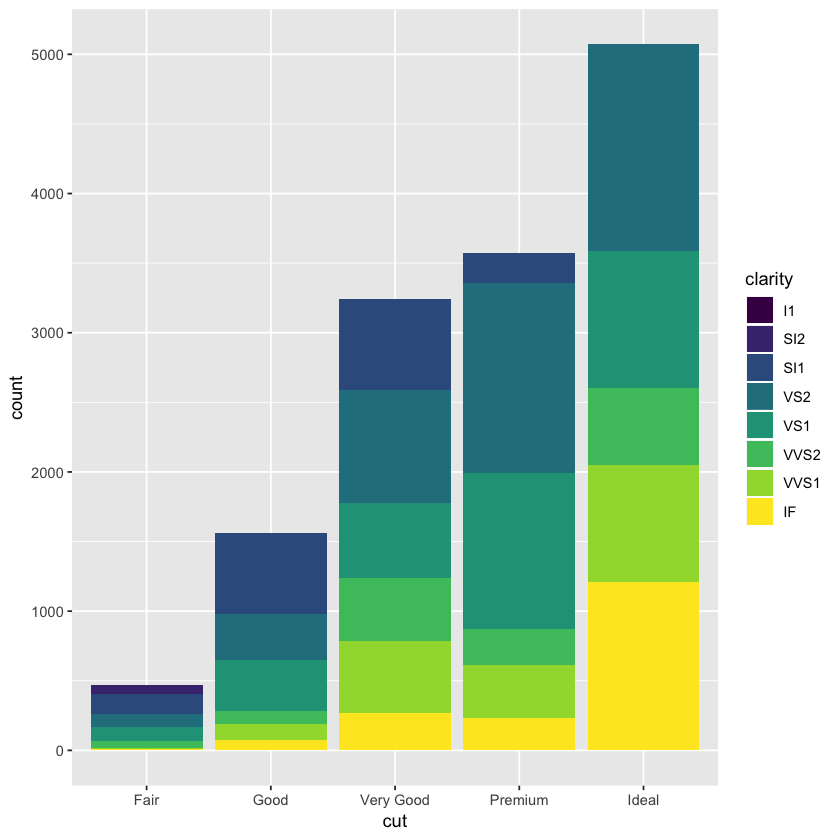

In [38]:
ggplot(diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position='identity')

*position 'fill'*
This works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

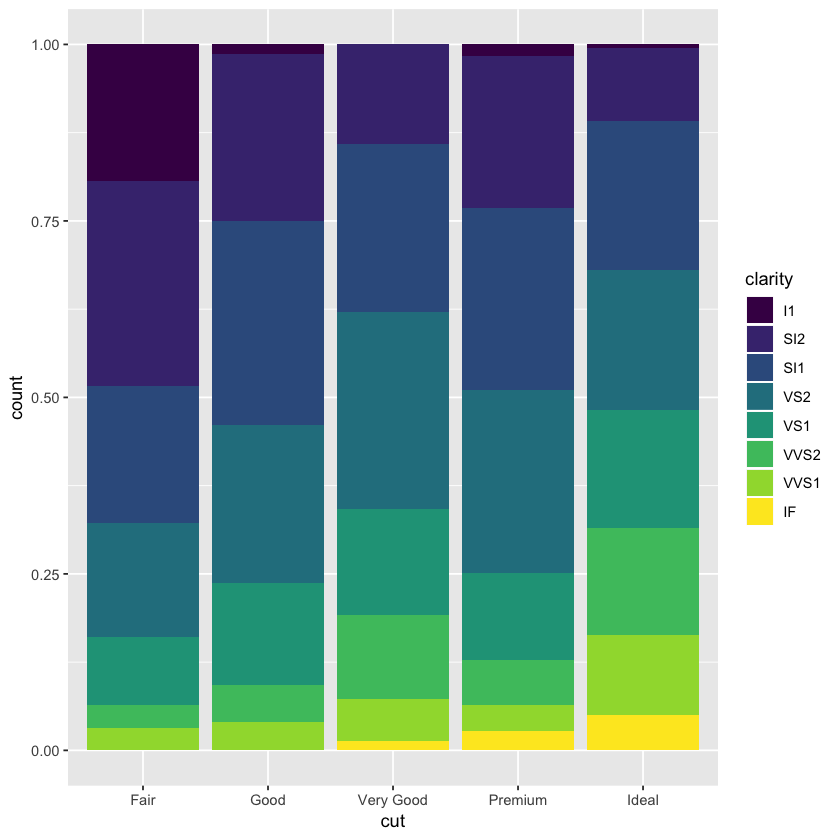

In [32]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

*position = 'dodge'*

This places overlapping objects directly beside one another, which makes it easier to compare individual values.

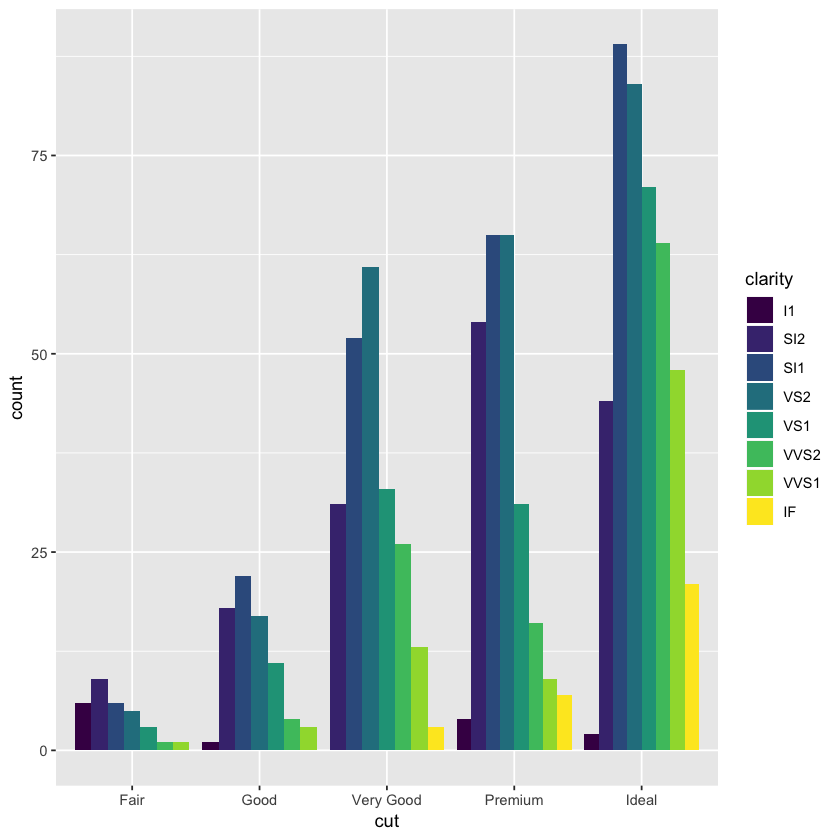

In [41]:
ggplot(data = dm) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

# dplyr for data manipulation

In [58]:
dim(dm)
head(dm)

[1] 1000   10

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.57,Ideal,E,VS1,61.4,57,1965,5.32,5.37,3.28
0.41,Premium,G,VS1,61.7,57,961,4.78,4.75,2.94
0.90,Ideal,E,VS2,62.7,56,4770,6.14,6.18,3.86
0.70,Good,D,VS2,64.1,59,3087,5.49,5.56,3.54
0.71,Ideal,E,SI1,62.0,56,2329,5.77,5.72,3.56
1.02,Good,H,SI2,63.1,59,4207,6.37,6.43,4.04


There are five functions in dplyr: filter, arrange, select, mutate and summarise. All of them have the following properties:
1. The first argument is a data frame.
2. The subsequent arguments describe what to do with the data frame, using the variable names( without quotes).
3. The result is a new data frame.

## Filter
Used if you want to view or store a new dataset containing a subset of the full dataset.

In [35]:
filter(dm, cut == 'Fair', color == 'J')

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.01,Fair,J,VS2,59.6,62,3886,6.54,6.49,3.88


Usually you want to store the newly subsetted data in memory. 

In [38]:
worst_diamonds = filter(dm, cut == 'Fair', color == 'J')

Make sure to use '==' instead of '='. The former is to test equality while the latter is for assignments. 

In [39]:
4 == 6
test = 6
test
test == 5

[1] FALSE

[1] 6

[1] FALSE

In [36]:
a = filter(dm, color == 'D' | color == 'J') 
# filtering for rows that satisfy one or both of the conditions

b = filter(dm, color == 'D' & color == 'J') 
# filtering for rows that satisfy both conditions

c = filter(dm, color == 'D') 
# filtering for rows that satisfy exactly one condition

best_cuts = filter(dm, cut %in% c('Ideal','Premium')) 
# filtering using membership condition

not_worst_cuts = filter(dm, cut > 'Fair') 
# can do this because cut is an ordinal variable

In [37]:
not_worst_cuts[1:20,]

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.50,Premium,I,SI2,62.2,62,7266,7.27,7.20,4.50
2.05,Premium,J,VS1,60.1,58,15067,8.25,8.19,4.94
0.53,Premium,E,SI2,60.5,60,1141,5.21,5.24,3.16
0.40,Premium,E,SI2,62.9,58,855,4.74,4.70,2.97
0.50,Premium,G,VS1,59.4,60,1746,5.17,5.13,3.06
0.41,Very Good,G,SI2,59.6,60,621,4.82,4.85,2.88
0.32,Ideal,H,VS1,61.3,55,561,4.41,4.43,2.71
0.42,Ideal,G,VVS2,62.4,55,1031,4.79,4.82,3.00
0.80,Good,E,VS2,63.4,56,3273,5.88,5.92,3.74


In R, if you want to find if a variable's value is missing, use the is.na() function. In particular, do not check for equality with NA:

In [44]:
x = 4
x == NA
is.na(x)

[1] NA

[1] FALSE

Similarly, never put an equality condition with NA in your dplyr filter() statements

In [49]:
# create a dataframe
df = tibble(x = c(1, NA, 3))
print(df)

# A tibble: 3 x 1
      x
  <dbl>
1     1
2    NA
3     3


In [50]:
filter(df, x>1)

x
3


In [52]:
filter(df, is.na(x) | x > 1)

x
NA
3


### Exercise
1. Write code using filter that will allow you to output diamonds with colors D or E and cuts Good or Very Good
2. Write code using filter that wil allow you to output diamonds with even-numbered prices

### Solution

In [62]:
filter(dm, (color == 'D' | color == 'E'), (cut == 'Good' | cut == 'Very Good'))

filter(dm, price %% 2 == 0)

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.70,Good,D,VS2,64.1,59,3087,5.49,5.56,3.54
1.53,Very Good,D,SI1,59.2,57,11873,7.52,7.55,4.46
0.30,Good,E,VS2,63.4,56,614,4.26,4.29,2.71
1.00,Good,E,VS2,58.2,60,6958,6.52,6.54,3.80
1.01,Good,E,SI1,63.8,60,4179,6.31,6.36,4.04
0.32,Very Good,E,VS2,62.0,54,702,4.37,4.41,2.72
0.70,Good,E,SI1,63.8,57,2569,5.59,5.63,3.58
0.24,Very Good,E,VS1,61.5,57,357,3.99,4.07,2.48
0.53,Very Good,D,SI1,61.4,57,1631,5.20,5.26,3.21


carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.90,Ideal,E,VS2,62.7,56.0,4770,6.14,6.18,3.86
0.58,Very Good,G,VVS2,62.1,58.0,1872,5.35,5.40,3.34
2.03,Ideal,H,SI1,62.9,57.0,16900,8.07,7.99,5.05
1.52,Ideal,G,VS2,61.1,57.0,12958,7.45,7.39,4.53
0.54,Ideal,G,VVS2,60.6,56.0,2090,5.27,5.26,3.19
0.54,Ideal,E,SI1,61.5,56.0,1720,5.26,5.22,3.23
1.50,Premium,I,SI1,58.6,62.0,8190,7.46,7.43,4.36
0.34,Ideal,E,VS2,62.0,56.0,646,4.46,4.48,2.77
2.16,Premium,H,SI2,59.7,60.0,16400,8.38,8.30,4.98


## Arrange
Useful for ordering rows instead of filtering for a subset of them

In [48]:
arrange(dm, desc(cut))[1:40,] 
# can be done since clarity is an ordinal variable

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.57,Ideal,E,VS1,61.4,57.0,1965,5.32,5.37,3.28
0.90,Ideal,E,VS2,62.7,56.0,4770,6.14,6.18,3.86
0.71,Ideal,E,SI1,62.0,56.0,2329,5.77,5.72,3.56
2.03,Ideal,H,SI1,62.9,57.0,16900,8.07,7.99,5.05
1.52,Ideal,G,VS2,61.1,57.0,12958,7.45,7.39,4.53
0.54,Ideal,G,VVS2,60.6,56.0,2090,5.27,5.26,3.19
0.39,Ideal,J,VVS2,62.0,54.5,687,4.67,4.70,2.90
1.30,Ideal,F,VVS2,62.1,55.0,12745,7.04,6.96,4.35
0.54,Ideal,E,SI1,61.5,56.0,1720,5.26,5.22,3.23


In [53]:
# arranging in the ascending order of carat and then descending order of cut
arrange(dm, color, desc(cut))[1:40,]

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.73,Ideal,D,SI2,62.4,56.0,2683,5.74,5.77,3.59
0.57,Ideal,D,SI2,61.9,56.0,1359,5.30,5.34,3.30
0.91,Ideal,D,SI2,62.2,57.0,2803,6.21,6.15,3.85
0.85,Ideal,D,SI1,61.9,56.0,4373,6.03,6.09,3.75
0.31,Ideal,D,VS1,60.5,55.0,877,4.43,4.39,2.67
0.34,Ideal,D,SI1,62.3,57.0,626,4.44,4.48,2.78
1.20,Ideal,D,SI2,61.7,56.0,6619,6.81,6.88,4.22
0.31,Ideal,D,SI1,61.2,57.0,684,4.38,4.34,2.67
0.52,Ideal,D,VS1,60.4,56.0,2146,5.24,5.26,3.17


Missing values are always sorted at the end:

In [49]:
df = tibble(x = c(5, NA, 2))
arrange(df, x)

x
2
5
NA


In [50]:
arrange(df, desc(x))

x
5
2
NA


### Exercise
Use arrange to sort the dm dataset by descending order of the product of the x, y, and z variables. Output the first 20 rows of the new dataset.

### Solution

In [49]:
arrange(dm, desc(x*y*z))[1:20,]

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
2.80,Premium,I,SI2,61.1,59.0,15030,9.03,8.98,5.50
2.75,Ideal,D,I1,60.9,57.0,13156,9.04,8.98,5.49
2.61,Ideal,I,SI2,62.1,56.0,18756,8.85,8.73,5.46
2.53,Premium,H,SI2,62.6,60.0,14659,8.66,8.55,5.39
2.50,Fair,H,SI2,64.9,58.0,13278,8.46,8.43,5.48
2.32,Very Good,I,SI1,63.2,59.0,18371,8.55,8.44,5.37
2.38,Very Good,J,VS2,62.6,59.0,16126,8.49,8.52,5.32
2.32,Premium,J,SI2,62.5,58.0,14666,8.47,8.43,5.28
2.28,Premium,H,SI2,61.9,61.0,16954,8.42,8.32,5.18


## Select
This is used to reduce the number of columns that we're dealing with. Useful for things like genetic data

In [57]:
names(dm)

[1] "carat"   "cut"     "color"   "clarity" "depth"   "table"   "price"  
 [8] "x"       "y"       "z"

In [58]:
select(dm, carat, price)[1:20,]

carat,price
0.33,666
2.10,6597
0.54,2616
1.26,6657
0.30,426
0.32,910
1.02,5198
0.24,552
0.51,1656
1.02,7277


In [59]:
select(dm, carat:price)[1:20,]

carat,cut,color,clarity,depth,table,price
0.33,Ideal,F,VS2,62.1,55,666
2.10,Fair,G,I1,64.6,58,6597
0.54,Ideal,E,VVS2,62.2,54,2616
1.26,Premium,F,SI2,61.3,58,6657
0.30,Ideal,D,SI2,62.0,56,426
0.32,Ideal,D,VVS1,61.8,56,910
1.02,Premium,D,SI2,59.7,60,5198
0.24,Very Good,E,VVS2,60.0,57,552
0.51,Ideal,E,VS2,62.2,57,1656
1.02,Very Good,E,SI1,63.7,55,7277


In [60]:
select(dm, -(carat:price))[1:20,]

x,y,z
4.45,4.47,2.77
8.05,8.01,5.19
5.23,5.26,3.26
6.99,6.91,4.26
4.31,4.34,2.68
4.37,4.40,2.71
6.58,6.55,3.92
4.07,4.10,2.45
5.08,5.11,3.17
6.29,6.40,4.04


Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you would like to move to the start of the dtaframe

In [64]:
select(dm, price, carat, everything())[1:20,]

price,carat,cut,color,clarity,depth,table,x,y,z
666,0.33,Ideal,F,VS2,62.1,55,4.45,4.47,2.77
6597,2.10,Fair,G,I1,64.6,58,8.05,8.01,5.19
2616,0.54,Ideal,E,VVS2,62.2,54,5.23,5.26,3.26
6657,1.26,Premium,F,SI2,61.3,58,6.99,6.91,4.26
426,0.30,Ideal,D,SI2,62.0,56,4.31,4.34,2.68
910,0.32,Ideal,D,VVS1,61.8,56,4.37,4.40,2.71
5198,1.02,Premium,D,SI2,59.7,60,6.58,6.55,3.92
552,0.24,Very Good,E,VVS2,60.0,57,4.07,4.10,2.45
1656,0.51,Ideal,E,VS2,62.2,57,5.08,5.11,3.17
7277,1.02,Very Good,E,SI1,63.7,55,6.29,6.40,4.04


There are some helper functions for select():
    starts_with()
    ends_with()
    contains()
    
### Exercise:
Write code that wil have price as the first column and the columns starting with the letter 'c' as the following columns. Output the first 20 rows of such a datset.

In [22]:
select(dm,starts_with())[1:20,]

Warning message in rbind(parts$upper, ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


1   
2   
3   
4   
5   
6   
7   
8   
9   
10  
11  
12  
13  
14  
15  
16  
17  
18  
19  
20  
21  
22  
23  
24  
25  
26  
27  
28  
29  
30  
⋮   
971 
972 
973 
974 
975 
976 
977 
978 
979 
980 
981 
982 
983 
984 
985 
986 
987 
988 
989 
990 
991 
992 
993 
994 
995 
996 
997 
998 
999 
1000

### Mutate
to create a computed column

In [65]:
dm_dimensions = select(dm, -(carat:price))

mutate(dm_dimensions, volume = x*y*z)[1:20,]

x,y,z,volume
4.45,4.47,2.77,55.09945
8.05,8.01,5.19,334.65380
5.23,5.26,3.26,89.68195
6.99,6.91,4.26,205.76183
4.31,4.34,2.68,50.13047
4.37,4.40,2.71,52.10788
6.58,6.55,3.92,168.94808
4.07,4.10,2.45,40.88315
5.08,5.11,3.17,82.28940
6.29,6.40,4.04,162.63424


If you only want to keep the new variables, use transmute()

In [66]:
transmute(dm_dimensions, volume = x*y*z)[1:20,]

volume
55.09945
334.65380
89.68195
205.76183
50.13047
52.10788
168.94808
40.88315
82.28940
162.63424


Read Section 5.5.1 in the book for some specific functions.

### Exercise
Add a new column that converts the US dollar prices to Chinese Yuan amounts. Then order the columns as [carat, WON price, price, ...] where '...' stands for everything else. Today's exchange rate is USD = 7.12 YUAN

## Summarise
Generally used with group_by() function to output summaries by group. Group summaries are seen in many applications

In [69]:
by_color = group_by(dm, color)
summarise(by_color, avg_price = mean(price, na.rm = TRUE))

color,avg_price
D,2727.400
E,3319.500
F,3351.632
G,4097.361
H,4394.646
I,4579.943
J,5561.892


In [70]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [71]:
mpg2 = mpg
mpg2$year = as.factor(mpg$year) # telling it we're dealing with a category column
mpg2 = mutate(mpg2, manual = ((grepl('manual', trans))))
head(mpg2)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,manual
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,FALSE
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,TRUE
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,TRUE
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,FALSE
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,FALSE
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,TRUE


In [72]:
by_maker_yr = group_by(mpg2, manufacturer, year)
hwy_summary = summarise(by_maker_yr,
                       count = n(),
                       hwy = mean(hwy, na.rm = TRUE),
                       cty = mean(cty, na.rm = TRUE))
hwy_summary

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
honda,1999,5,31.60000,24.80000
honda,2008,4,33.75000,24.00000


In [73]:
hwy_summary_ag = filter(hwy_summary, substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))
hwy_summary_ag

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000


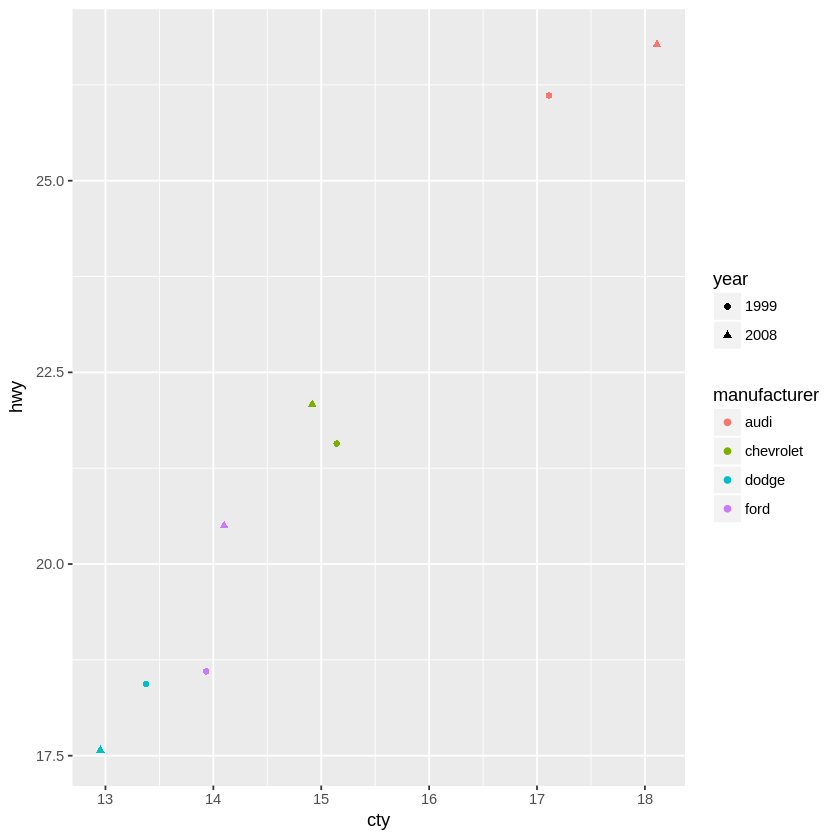

In [74]:
ggplot(data = hwy_summary_ag, mapping = aes(x = cty, y = hwy)) + 
geom_point(mapping = aes(color = manufacturer, shape = year))

## Pipes
The transformations above can be written as:


In [75]:
hwy_summary_ag2 = mpg2 %>% 
group_by(manufacturer, year) %>%
summarise(
    count = n(),
    hwy = mean(hwy, na.rm = TRUE),
    cty = mean(cty, na.rm = TRUE)) %>%
filter(substring(manufacturer,1,1) %in% c('a','b','c','d','e','f','g'))

In [76]:
hwy_summary_ag2

manufacturer,year,count,hwy,cty
audi,1999,9,26.11111,17.11111
audi,2008,9,26.77778,18.11111
chevrolet,1999,7,21.57143,15.14286
chevrolet,2008,12,22.08333,14.91667
dodge,1999,16,18.43750,13.37500
dodge,2008,21,17.57143,12.95238
ford,1999,15,18.60000,13.93333
ford,2008,10,20.50000,14.10000
